In [13]:
import pandas as pd
from matplotlib.widgets import CheckButtons
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# รับข้อมูล
cols_to_use = ['Character', 'Time']
key = pd.read_csv("1 key/a1.csv", usecols = cols_to_use)

print(key)

      Character    Time
0             C    1218
1             O     741
2             N     792
3             S     899
4             S    3272
...         ...     ...
11268         T   70852
11269         E  102772
11270         E   96096
11271         R  112542
11272         D   91997

[11273 rows x 2 columns]


In [3]:
# ตัด + เรียงข้อมูล 
key = key[key.Time >= 0]
key = key[key.Time <= 10000]
key = key.sort_values(by=['Character'])

# จัดกลุ่มข้อมูล Character และหาค่าเฉลี่ย
means = key.groupby('Character')['Time'].mean()
means = pd.DataFrame(means)

print(means)

                  Time
Character             
A          1502.313869
B          1220.022222
C          1497.193878
D          1777.881443
E          1777.814732
F          1208.895833
G          1217.075758
H          1090.290000
I          1340.074074
J          1180.083333
K          1061.400000
L           938.275281
M          1058.368421
N          1384.957929
O          1186.630952
P          1244.517241
Q          1212.434783
R          1311.953704
S          1323.577889
T          1405.242009
U          1078.096491
V          1156.354839
W          1712.965517
X          1341.777778
Y          1018.256000
Z          1072.500000


In [4]:
# หา % ค่าเฉลี่ย
Per5 = means['Time'] * 0.05
Per10 = means['Time'] * 0.1
Per15 = means['Time'] * 0.15
Per20 = means['Time'] * 0.2

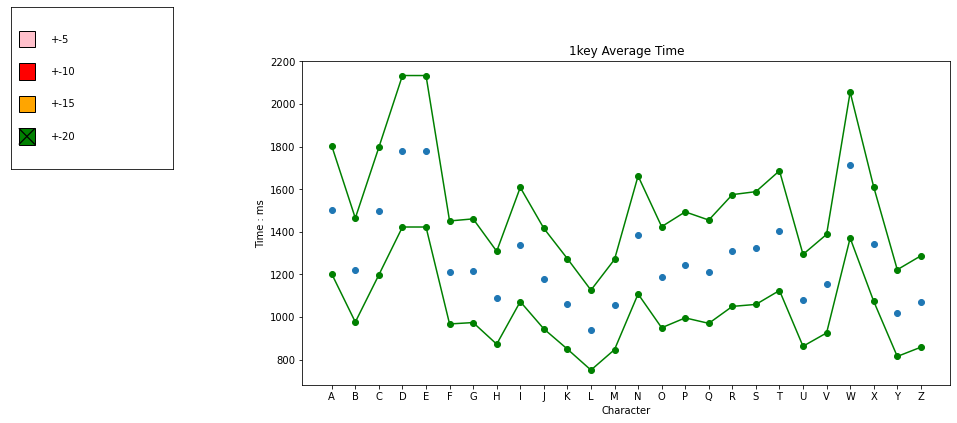

In [5]:
# สร้างตารางเก็บ % และ ค่าเฉลี่ย
ts = pd.DataFrame()
ts['average'] = means['Time']
ts['5%'] = Per5
ts['+5%'] = ts['average'] + ts['5%']
ts['-5%'] = ts['average'] - ts['5%']

ts['10%'] = Per10
ts['+10%'] = ts['average'] + ts['10%']
ts['-10%'] = ts['average'] - ts['10%']

ts['15%'] = Per15
ts['+15%'] = ts['average'] + ts['15%']
ts['-15%'] = ts['average'] - ts['15%']

ts['20%'] = Per20
ts['+20%'] = ts['average'] + ts['20%']
ts['-20%'] = ts['average'] - ts['20%']

def threshold():
    fig, ax = plt.subplots(figsize=(15,15))
    plt.scatter(means.index,means['Time'])
    l0, = ax.plot(ts.index,ts['+5%'],marker="o",color="pink",visible = False)
    l1, = ax.plot(ts.index,ts['-5%'],marker="o",color="pink",visible = False)
    l2, = ax.plot(ts.index,ts['+10%'],marker="o",color="red",visible = False)
    l3, = ax.plot(ts.index,ts['-10%'],marker="o",color="red",visible = False)
    l4, = ax.plot(ts.index,ts['+15%'],marker="o",color="orange",visible = False)
    l5, = ax.plot(ts.index,ts['-15%'],marker="o",color="orange",visible = False)
    l6, = ax.plot(ts.index,ts['+20%'],marker="o",color="green")
    l7, = ax.plot(ts.index,ts['-20%'],marker="o",color="green")
    
    plt.title("1key Average Time")
    plt.xlabel("Character")
    plt.ylabel("Time : ms")

    # legend
    # plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

    # checkbuton distance
    plt.subplots_adjust(left=0.3, bottom=0.2, right=0.9, top=0.5)

    rax = plt.axes([0.03, 0.4, 0.15, 0.15])
    check = CheckButtons(rax, ('+-5', '+-10', '+-15', '+-20'), (False, False, False, True))
    #check = CheckButtons(rax, ('+-5', '+-10', '+-15', '+-20'), (True, False, False, True))

    #Define colours for rectangles and set them
    c = ['pink', 'red', 'orange', "green"]    
    [rec.set_facecolor(c[i]) for i, rec in enumerate(check.rectangles)]
    
    def func(label):
        if label == '+-5':
            l0.set_visible(not l0.get_visible())
            l1.set_visible(not l1.get_visible())
        elif label == '+-10':
            l2.set_visible(not l2.get_visible())
            l3.set_visible(not l3.get_visible())
        elif label == '+-15':
            l4.set_visible(not l4.get_visible())
            l5.set_visible(not l5.get_visible())
        elif label == '+-20':
            l6.set_visible(not l6.get_visible())
            l7.set_visible(not l7.get_visible())
        plt.draw()
    check.on_clicked(func)

    plt.show()


if __name__ == '__main__':
    # print(ts)
    # print(means)
    # test()
    # threshold()
    # threshold2()
    threshold()
    # thresholdA()
    # print(means)
    # mean_graph2()
    # mean_graph1()
    # test4()
    # test5()

In [6]:
# พล็อตกราฟ test ของแต่ละ user

  Character    R1    R2    R3
0         C  1218  1289  5334
1         H  1415  2489  3568
2         A  1646  2325  3577
3         T  1403  4587  1277
4       C.1  1575  6322  3955
5       H.1  1418  3267  4732
6       A.1  1303  4683  8442
7         I  1323  2557  4582


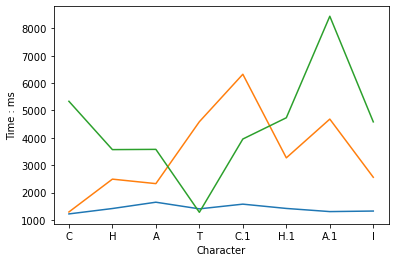

In [7]:
testIden = pd.read_csv("1 key/a1_test.csv")

print(testIden)
plt.xlabel("Character")
plt.ylabel("Time : ms")

plt.plot(testIden.Character, testIden.R1, label='Round 1')
plt.plot(testIden.Character, testIden.R2, label='Round 2')
plt.plot(testIden.Character, testIden.R3, label='Round 3')


  Character    R1    R2    R3
0         P  5648  9760  3586
1         I  2348  3476  5647
2         Y  4526  3578  4587
3         A  1278  5687  7543
4         W  3538  5689  4221
5       A.1  3578  6532  2365
6         T  6743  4587  3576


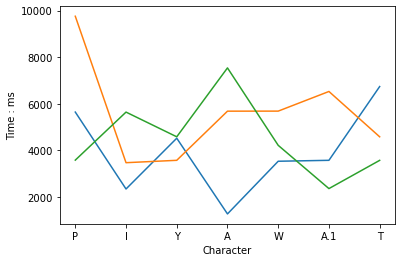

In [9]:
testIden = pd.read_csv("1 key/a2_test.csv")

print(testIden)
plt.xlabel("Character")
plt.ylabel("Time : ms")

plt.plot(testIden.Character, testIden.R1, label='Round 1')
plt.plot(testIden.Character, testIden.R2, label='Round 2')
plt.plot(testIden.Character, testIden.R3, label='Round 3')


In [10]:
# แสดง Average และ Treshold ของแต่ละ user : a1

In [11]:
testIden = pd.read_csv("1 key/Avg_a1_with_treshold.csv")

print(testIden)

   Character         Time     Per_T_5      Per_B_5      Per_T_10     Per_B_10  \
0          A  3572.000000  3750.60000  3393.400000   3929.200000  3214.800000   
1          C  1218.000000  1278.90000  1157.100000   1339.800000  1096.200000   
2          D  2302.000000  2417.10000  2186.900000   2532.200000  2071.800000   
3          E  7386.250000  7755.56250  7016.937500   8124.875000  6647.625000   
4          F   878.000000   921.90000   834.100000    965.800000   790.200000   
5          G  1425.000000  1496.25000  1353.750000   1567.500000  1282.500000   
6          H  8836.000000  9277.80000  8394.200000   9719.600000  7952.400000   
7          I  3629.250000  3810.71250  3447.787500   3992.175000  3266.325000   
8          J  2228.000000  2339.40000  2116.600000   2450.800000  2005.200000   
9          L  1634.000000  1715.70000  1552.300000   1797.400000  1470.600000   
10         N  5222.125000  5483.23125  4961.018750   5744.337500  4699.912500   
11         O   822.000000   

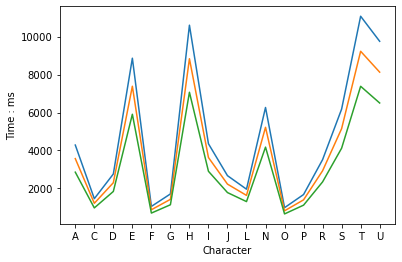

In [12]:
plt.xlabel("Character")
plt.ylabel("Time : ms")

plt.plot(testIden.Character, testIden.Per_T_20)
plt.plot(testIden.Character, testIden.Time)
plt.plot(testIden.Character, testIden.Per_B_20)

In [ ]:
c h a t c h a i

In [ ]:
c = 1
h = 0
a = 0
t = 1
c = 1
h = 1
a = 1
i = 1


1 = in >> real user
0 = out >> fake user
 
in 6/8 >>> %
out 2/8 >>> %

4/8 >> unidentify

In [ ]:
# เปรียบเทียบ test ว่าอยู่ในขอบเขตของ treshold หรือไม่

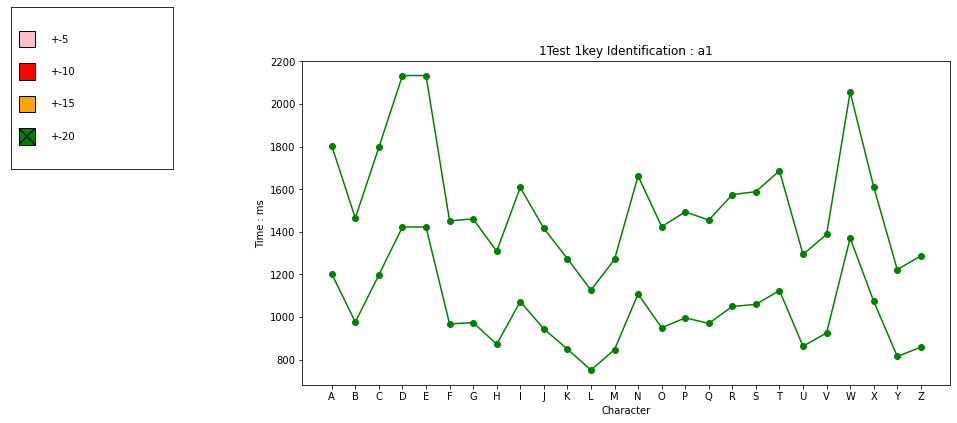

In [88]:
# สร้างตารางเก็บ % และ ค่าเฉลี่ย
ts = pd.DataFrame()
ts['average'] = means['Time']
ts['5%'] = Per5
ts['+5%'] = ts['average'] + ts['5%']
ts['-5%'] = ts['average'] - ts['5%']

ts['10%'] = Per10
ts['+10%'] = ts['average'] + ts['10%']
ts['-10%'] = ts['average'] - ts['10%']

ts['15%'] = Per15
ts['+15%'] = ts['average'] + ts['15%']
ts['-15%'] = ts['average'] - ts['15%']

ts['20%'] = Per20
ts['+20%'] = ts['average'] + ts['20%']
ts['-20%'] = ts['average'] - ts['20%']

def threshold():
    fig, ax = plt.subplots(figsize=(15,15))
    #plt.scatter(means.index,means['Time'])
    #plt.plot(testIden.Character, testIden.Time, c='red')
    
    l0, = ax.plot(ts.index,ts['+5%'],marker="o",color="pink",visible = False)
    l1, = ax.plot(ts.index,ts['-5%'],marker="o",color="pink",visible = False)
    l2, = ax.plot(ts.index,ts['+10%'],marker="o",color="red",visible = False)
    l3, = ax.plot(ts.index,ts['-10%'],marker="o",color="red",visible = False)
    l4, = ax.plot(ts.index,ts['+15%'],marker="o",color="orange",visible = False)
    l5, = ax.plot(ts.index,ts['-15%'],marker="o",color="orange",visible = False)
    l6, = ax.plot(ts.index,ts['+20%'],marker="o",color="green")
    l7, = ax.plot(ts.index,ts['-20%'],marker="o",color="green")
    
    plt.title("1Test 1key Identification : a1")
    plt.xlabel("Character")
    plt.ylabel("Time : ms")
    
    # legend
    # plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

    # checkbuton distance
    plt.subplots_adjust(left=0.3, bottom=0.2, right=0.9, top=0.5)

    rax = plt.axes([0.03, 0.4, 0.15, 0.15])
    check = CheckButtons(rax, ('+-5', '+-10', '+-15', '+-20'), (False, False, False, True))
    #check = CheckButtons(rax, ('+-5', '+-10', '+-15', '+-20'), (True, False, False, True))

    #Define colours for rectangles and set them
    c = ['pink', 'red', 'orange', "green"]    
    [rec.set_facecolor(c[i]) for i, rec in enumerate(check.rectangles)]
    
    def func(label):
        if label == '+-5':
            l0.set_visible(not l0.get_visible())
            l1.set_visible(not l1.get_visible())
        elif label == '+-10':
            l2.set_visible(not l2.get_visible())
            l3.set_visible(not l3.get_visible())
        elif label == '+-15':
            l4.set_visible(not l4.get_visible())
            l5.set_visible(not l5.get_visible())
        elif label == '+-20':
            l6.set_visible(not l6.get_visible())
            l7.set_visible(not l7.get_visible())
        plt.draw()
    check.on_clicked(func)

if __name__ == '__main__':
    threshold()
    
plt.show()

In [ ]:
#เซฟไฟล์ csv

In [ ]:
means.to_csv(r'C:\Users\Inthenameofnan\1 key\Avg_a15.csv')

In [ ]:
# พล็อตกราฟค่าเฉลี่ยของแต่ละ user

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# compare all user by average time
df1 = pd.read_csv("1 key/Average 1 key all.csv")

In [14]:
print(df1)

   Unnamed: 0           a1           a2           a3           a4  \
0           A  3572.000000  1496.500000  1234.860078  1448.201361   
1           B          NaN  1384.000000   648.348214  1190.989270   
2           C  1218.000000  1921.000000   907.097691  1376.723478   
3           D  2302.000000  2210.000000  1188.641450  1239.943323   
4           E  7386.250000  1041.000000  1218.478300  1370.653268   
5           F   878.000000   904.000000   860.748837  1186.216216   
6           G  1425.000000  1299.250000   835.450512  1185.046039   
7           H  8836.000000          NaN   681.758225   919.425694   
8           I  3629.250000  1354.000000   798.642537   790.036239   
9           J  2228.000000          NaN   644.419643   774.229508   
10          K          NaN  1563.000000   802.831818   810.635955   
11          L  1634.000000          NaN   809.588608   851.890650   
12          M          NaN  1236.000000   731.474104   874.150000   
13          N  5222.125000  1174.0

Text(0, 0.5, 'Time : ms')

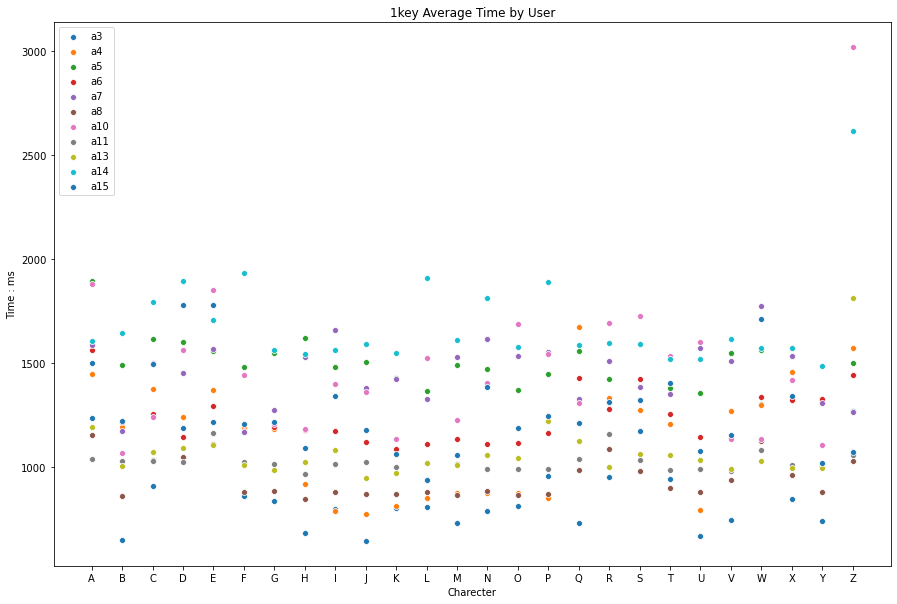

In [15]:
plt.figure(figsize=(15,10))
#sns.scatterplot(data=df1, x ='Unnamed: 0',y='a1', label='a1')
#sns.scatterplot(data=df1, x ='Unnamed: 0',y='a2', label='a2')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a3', label='a3')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a4', label='a4')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a5', label='a5')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a6', label='a6')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a7', label='a7')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a8', label='a8')
#sns.scatterplot(data=df1, x ='Unnamed: 0',y='a9', label='a9')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a10', label='a10')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a11', label='a11')
#sns.scatterplot(data=df1, x ='Unnamed: 0',y='a12', label='a12')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a13', label='a13')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a14', label='a14')
sns.scatterplot(data=df1, x ='Unnamed: 0',y='a15', label='a15')
plt.title("1key Average Time by User")
plt.xlabel('Charecter')
plt.ylabel('Time : ms')

Text(0, 0.5, 'Time : ms')

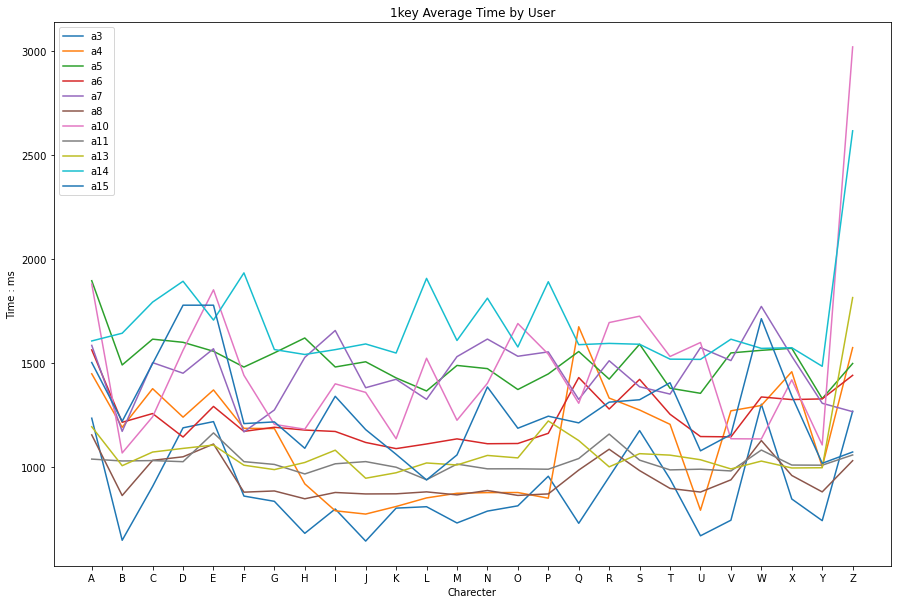

In [350]:
plt.figure(figsize=(15,10))
#sns.lineplot(data=df1, x ='Unnamed: 0',y='a1', label='a1')
#sns.lineplot(data=df1, x ='Unnamed: 0',y='a2', label='a2')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a3', label='a3')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a4', label='a4')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a5', label='a5')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a6', label='a6')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a7', label='a7')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a8', label='a8')
#sns.lineplot(data=df1, x ='Unnamed: 0',y='a9', label='a9')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a10', label='a10')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a11', label='a11')
#sns.lineplot(data=df1, x ='Unnamed: 0',y='a12', label='a12')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a13', label='a13')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a14', label='a14')
sns.lineplot(data=df1, x ='Unnamed: 0',y='a15', label='a15')
plt.title("1key Average Time by User")
plt.xlabel('Charecter')
plt.ylabel('Time : ms')